In [8]:
import numpy as np
import matplotlib.pyplot as plt
import jupyter as j
import importlib
importlib.reload(j)

import matplotlib.ticker as ticker
import glob

custom jupyter @DanielRobinson


In [9]:
def attdt():
    atf = {}
    atten = np.arange(0, 50, 10)
    for at in atten:
        atf[str(at) + ' dB'] = []
    atf['50-110 dB'] = []
    return atf

In [46]:
files = []
files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
# files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
# files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
# files.append(['drx/cap/*'])
# files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

['release/release1/*', 'release/release16/*', 'release/release64/*', 'release/release128/*', 'release/release256/*', 'release/release512/*', 'release/release0/*']


logs/zte_mtn/rf_shield/ublox/


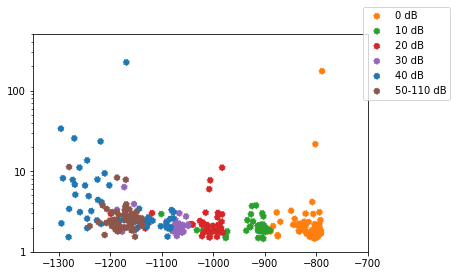

histogram
logs/zte_mtn/rf_shield/quectel/
'Signal power'


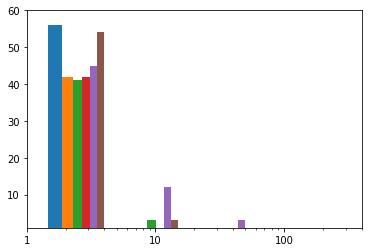

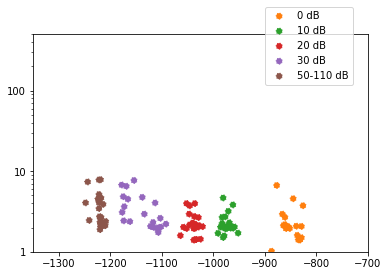

histogram
logs/nokia_vodacom/centurycity/ublox/
'Signal power'


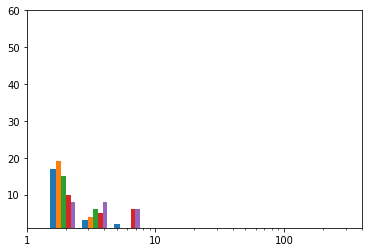

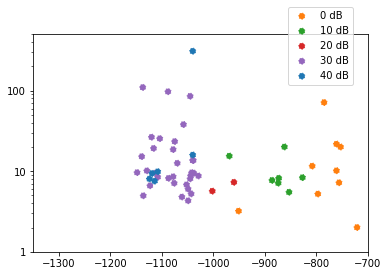

histogram
logs/nokia_vodacom/centurycity/quectel/


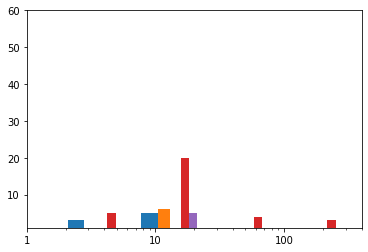

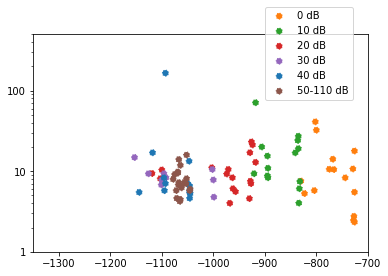

histogram


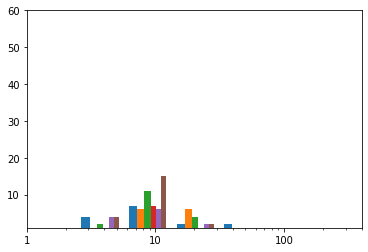

In [134]:
cc = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:blue', 'tab:brown']

dirrs = ['logs/zte_mtn/rf_shield/ublox/', 'logs/zte_mtn/rf_shield/quectel/', 'logs/nokia_vodacom/centurycity/ublox/', 'logs/nokia_vodacom/centurycity/quectel/']
# dirr = 'logs/zte_mtn/rf_shield/ublox/'
# dirr = 'logs/zte_mtn/rf_shield/quectel/'
# dirr = 'logs/nokia_vodacom/centurycity/ublox/'
# dirr = 'logs/nokia_vodacom/centurycity/quectel/'

plimx = [None, None]
plimy = [None, None]
hlimx = [None, None]
hlimy = [None, None]

plimx= [-1350,  -700.]
plimy= [1, 500]
hlimx= [1, 400]
hlimy= [1, 60]

# plimx = [None, -500]
# plimy = [1, 15]
# hlimx = [0.5, 15]
# hlimx = [0.5, 15]

paxis = []
haxis = []

for dirr in dirrs:
    print(dirr)
    ####################### file prep #######################
    atf = attdt()
    atten = np.arange(110, -1, -10)
    # starfolder = 'release/release128/*'
    for starfolder in files:
        subfiles = glob.glob(dirr + starfolder)
        for file in subfiles:
            f = file.split('\\')[-1]
            for atn in atten:
                if str(atn) in f:
                    # print(atn, file)
                    if atn >= 50:
                        atf['50-110 dB'].append(file)
                    else:
                        atf[str(atn) + ' dB'].append(file)
                    break
            else:
                print('else', file)
                atf['50-110 dB'].append(file)

    ####################### database {} prep #######################

    atd = attdt()
    for k in atf:
        # print(k, atf[k])
        for f in atf[k]:
            c = j.csvToDict(f)
            dp = j.dataProcess(c)
            atd[k].append(dp)
        atd[k] = j.merge(atd[k])
        # print('atd[k]', len(atd[k]))

    ####################### scatter #######################
    ky = 'txTime'
    kx = 'Signal power'
    fig = plt.figure()
    y = []
    x = []
    ka = []

    for i, k in enumerate(atd):
        try:
            ka.append(k)
            xx = np.array(atd[k][kx])
            yy = np.array(atd[k][ky])
            r = xx == xx
            r *= xx < -100
            r *= xx > -2000
            r2 = yy == yy
            r *= yy > 0
            r *= r2
            yy /= 1000
            plt.scatter(xx[r], yy[r], linestyle='dotted', color=cc[i], label=k)
            x.append(xx[r])
            y.append(yy[r])
        except (KeyError, IndexError) as e:
            print(e)
    ax = plt.gca()
    paxis.append(ax)
    ax.set_yscale('log')
    ax.set_xlim(plimx)
    ax.set_ylim(plimy)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(max(y, 0.01)),0)))).format(y)))
    plt.legend(bbox_to_anchor=(0.97, 1.15))
    plt.show()

    ####################### histogram #######################
    print('histogram')
    fig = plt.figure()
    try:
        data = np.concatenate(np.ravel(y))
    except ValueError:
        data = np.ravel(y)
    finally:
        _, lbins = np.histogram(data, bins=5)
        logbins = np.logspace(np.log10(lbins[0]), np.log10(lbins[-1]), len(lbins))
        ax = plt.gca()
        haxis.append(ax)
        n, rbins, _ = ax.hist(y, bins=logbins)
        plt.xscale('log')

    ax.set_xlim(hlimx)
    ax.set_ylim(hlimy)

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(max(y, 0.01)),0)))).format(y)))
        
# # pxmin = pymin = pxmax = pymax = 1
# # hxmin = hymin = hxmax = hymax = 1
# plim = [1000, -1000]*2
# hlim = [1000, -1000]*2
# for pax, hax in zip(paxis, haxis):
#     for i, p in enumerate(pax.axis()):
#         plim[i] = min(plim[i], p) if i in [0, 2] else max(plim[i], p)
#     for i, h in enumerate(hax.axis()):
#         hlim[i] = min(hlim[i], h) if i in [0, 2] else max(hlim[i], h)
# for pax, hax in zip(paxis, haxis):
#     pax.set_xlim(plim[:2])
#     pax.set_ylim(plim[2:])
#     hax.set_xlim(hlim[:2])
#     hax.set_ylim(hlim[2:])
#     for axis in [pax.yaxis, hax.yaxis]:
#         axis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(max(y, 0.01)),0)))).format(y)))
# np.set_printoptions(precision=0, suppress=True)        
# print('plimx=', np.array(plim[:2]))
# print('plimy=', np.array(plim[2:]))
# print('hlimx=', np.array(hlim[:2]))
# print('hlimy=', np.array(hlim[2:]))

# plt.show()
#     # plt.xscale('log')